In [1]:
%matplotlib inline

In [2]:
from astropy.table import Table

fname = "/Users/aphearin/Dropbox/protoDC2/value_added_protoDC2_snapnum_487.hdf5"
protoDC2_z0 = Table.read(fname, path='data')
    
from rescale_dc2.load_catalogs import load_closest_available_umachine_catalog
umachine_z0 = load_closest_available_umachine_catalog(0.)

from rescale_dc2.load_catalogs import load_dc2_sdss
sdss = load_dc2_sdss()

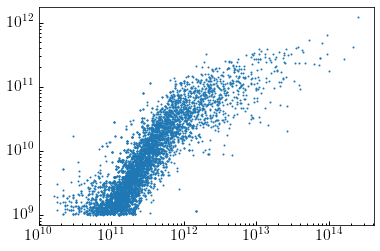

In [3]:
from rescale_dc2.rescale_snapshot import rescale_stellar_mass
rescaled_mstar_dc2 = rescale_stellar_mass(protoDC2_z0, umachine_z0)

cenmask = rescaled_mstar_dc2['isCentral'] == 1

fig, ax = plt.subplots(1, 1)

__=ax.loglog()
__=ax.scatter(rescaled_mstar_dc2['hostHaloMass'][cenmask][::100], 
             rescaled_mstar_dc2['rescaled_mstar'][cenmask][::100], s=1)

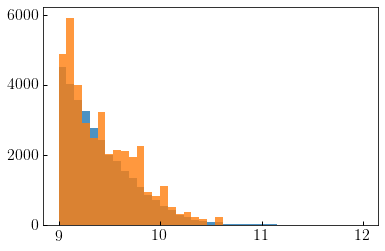

In [22]:
low_mhost, high_mhost = 11., 12

um_satmask = umachine_z0['upid'] != -1
um_satmask *= umachine_z0['host_halo_mvir'] >= 10**low_mhost
um_satmask *= umachine_z0['host_halo_mvir'] < 10**high_mhost

pdc2_satmask = rescaled_mstar_dc2['isCentral'] == 0
pdc2_satmask *= rescaled_mstar_dc2['hostHaloMass'] >= 10**low_mhost
pdc2_satmask *= rescaled_mstar_dc2['hostHaloMass'] < 10**high_mhost

fig, ax = plt.subplots(1, 1)

logsm_bins = np.linspace(9, 12, 40)
__=ax.hist(np.log10(umachine_z0['obs_sm'][um_satmask]), 
           bins=logsm_bins, normed=False, alpha=0.8)
__=ax.hist(np.log10(rescaled_mstar_dc2['rescaled_mstar'][pdc2_satmask]),
           bins=logsm_bins, normed=False, alpha=0.8)

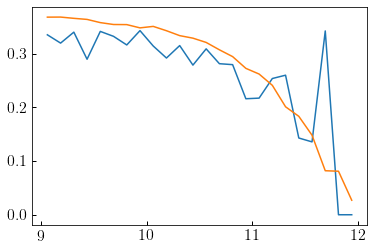

In [9]:
from scipy.stats import binned_statistic

logsm_bins = np.linspace(9, 12, 25)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

fsat, __, __ = binned_statistic(
    rescaled_mstar_dc2['rescaled_mstar'], rescaled_mstar_dc2['isCentral']==0, 
    bins=10**logsm_bins)

fsat2, __, __ = binned_statistic(
    umachine_z0['obs_sm'], umachine_z0['upid']!=-1, 
    bins=10**logsm_bins)

fig, ax = plt.subplots(1, 1)

__=ax.plot(logsm_mids, fsat)
__=ax.plot(logsm_mids, fsat2)

In [10]:
from rescale_dc2.rescale_snapshot import rescale_ssfr
rescaled_ssfr_dc2 = rescale_ssfr(rescaled_mstar_dc2, umachine_z0)

In [11]:
from rescale_dc2.rescale_snapshot import assign_sdss_restframe_absolute_ugriz
dc2 = assign_sdss_restframe_absolute_ugriz(rescaled_ssfr_dc2, sdss)

print(dc2.keys())

['magnitude:SDSS_u:rest', 'magnitude:SDSS_g:rest', 'magnitude:SDSS_r:rest', 'magnitude:SDSS_i:rest', 'magnitude:SDSS_z:rest', 'infallHaloMass', 'hostHaloMass', 'hostIndex', 'isCentral', 'spheroidMassStellar', 'totalMassStellar', 'galaxyID', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'totalStarFormationRate', 'totalStarFormationRate_percentile_fixed_totalMassStellar', 'rescaled_mstar', 'host_mass_bin', 'ssfr', 'remapped_ssfr', 'remapped_ssfr_no_scatter', 'AbsMagu', 'AbsMagg', 'AbsMagr', 'AbsMagi', 'AbsMagz', 'matched_mstar']


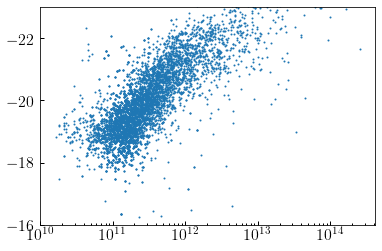

In [15]:
cenmask = rescaled_mstar_dc2['isCentral'] == 1

fig, ax = plt.subplots(1, 1)
xlog = ax.set_xscale('log')
__=ax.scatter(dc2['hostHaloMass'][cenmask][::100], 
             dc2['AbsMagr'][cenmask][::100], s=1)
ylim = ax.set_ylim(-16, -23)

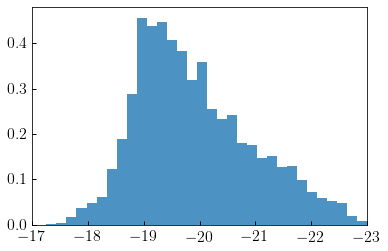

In [18]:
low_mhost, high_mhost = 13., 14

um_satmask = umachine_z0['upid'] != -1
um_satmask *= umachine_z0['host_halo_mvir'] >= 10**low_mhost
um_satmask *= umachine_z0['host_halo_mvir'] < 10**high_mhost

pdc2_satmask = dc2['isCentral'] == 0
pdc2_satmask *= dc2['hostHaloMass'] >= 10**low_mhost
pdc2_satmask *= dc2['hostHaloMass'] < 10**high_mhost

fig, ax = plt.subplots(1, 1)

magr_bins = np.linspace(-23, -16, 40)
# __=ax.hist(np.log10(umachine_z0['obs_sm'][um_satmask]), 
#            bins=logsm_bins, normed=True, alpha=0.8)
__=ax.hist(dc2['AbsMagr'][pdc2_satmask],
           bins=magr_bins, normed=True, alpha=0.8)
xlim = ax.set_xlim(-17, -23)

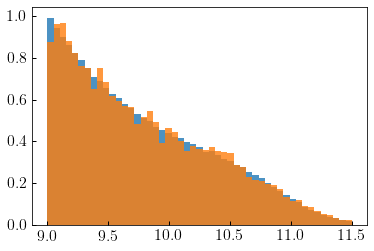

In [44]:
fig, ax = plt.subplots(1, 1)

logsm_bins = np.linspace(9, 11.5, 50)
__=ax.hist(np.log10(umachine_z0['obs_sm']), bins=logsm_bins, alpha=0.8, normed=True)
__=ax.hist(np.log10(dc2['rescaled_mstar']), bins=logsm_bins, alpha=0.8, normed=True)

In [37]:
from halotools.mock_observables import return_xyz_formatted_array, tpcf

rbins = np.logspace(-1, 1.25, 25)
rmids = 10**(0.5*(np.log10(rbins[:-1]) + np.log10(rbins[1:])))

mask1a = dc2['rescaled_mstar'] > 10**10
pos_pdc2_mask1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask1a, period=256.)

mask1b = umachine_z0['obs_sm'] > 10**10
pos_um_mask1 = return_xyz_formatted_array(
        umachine_z0['x'], umachine_z0['y'], umachine_z0['z'], mask=mask1b, period=250.)

xi_um_1 = tpcf(pos_um_mask1, rbins, period=250)
xi_pdc2_1 = tpcf(pos_pdc2_mask1, rbins, period=256)




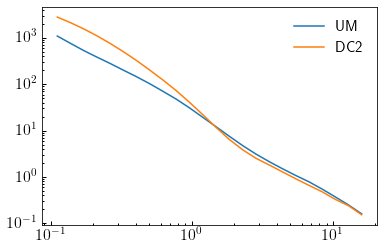

In [40]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()
__=ax.plot(rmids, xi_um_1, label='UM')
__=ax.plot(rmids, xi_pdc2_1, label='DC2')
legend = ax.legend()

In [23]:
from halotools.mock_observables import return_xyz_formatted_array, wp

rp_bins = np.logspace(-1, 1.35, 25)
rp_mids = 10**(0.5*(np.log10(rp_bins[:-1]) + np.log10(rp_bins[1:])))
pi_max = 20.

mask_r1 = dc2['AbsMagr'] < -18.5
mask_r2 = dc2['AbsMagr'] < -20.5
mask_r3 = dc2['AbsMagr'] < -22

pos_r1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_r1, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_r2 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_r2, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_r3 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_r3, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

wp_r1 = wp(pos_r1, rp_bins, pi_max, period=256., num_threads='max')
wp_r2 = wp(pos_r2, rp_bins, pi_max, period=256., num_threads='max')
wp_r3 = wp(pos_r3, rp_bins, pi_max, period=256., num_threads='max')


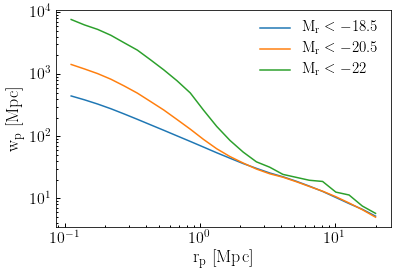

In [24]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_mids, wp_r1, label=r'${\rm M_{r} < -18.5}$')
__=ax.plot(rp_mids, wp_r2, label=r'${\rm M_{r} < -20.5}$')
__=ax.plot(rp_mids, wp_r3, label=r'${\rm M_{r} < -22}$')

xlabel = ax.set_xlabel(r'${\rm r_{p}\ [Mpc]}$')
ylabel = ax.set_ylabel(r'${\rm w_{p}\ [Mpc]}$')

legend = ax.legend()

In [ ]:
mask_i1 = dc2['AbsMagi'] < -18.5
mask_i2 = dc2['AbsMagi'] < -20.5
mask_i3 = dc2['AbsMagi'] < -22

pos_i1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_i1, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_i2 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_i2, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_i3 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_i3, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(dc2['AbsMagi'], bins=50)
# xlim = ax.set_xlim(-16, -23)

wp_i1 = wp(pos_i1, rp_bins, pi_max, period=256., num_threads='max')
wp_i2 = wp(pos_i2, rp_bins, pi_max, period=256., num_threads='max')
wp_i3 = wp(pos_i3, rp_bins, pi_max, period=256., num_threads='max')


In [ ]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_mids, wp_i1, label=r'${\rm M_{i} < -18.5}$')
__=ax.plot(rp_mids, wp_i2, label=r'${\rm M_{i} < -20.5}$')
__=ax.plot(rp_mids, wp_i3, label=r'${\rm M_{i} < -22}$')

xlabel = ax.set_xlabel(r'${\rm r_{p}\ [Mpc]}$')
ylabel = ax.set_ylabel(r'${\rm w_{p}\ [Mpc]}$')

legend = ax.legend()

In [ ]:
mask_g1 = dc2['AbsMagi'] < -19
mask_g2 = dc2['AbsMagi'] < -20.5
mask_g3 = dc2['AbsMagi'] < -22

pos_g1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_g1, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_g2 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_g2, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_g3 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_g3, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(dc2['AbsMagg'], bins=50)
# xlim = ax.set_xlim(-16, -23)

wp_g1 = wp(pos_g1, rp_bins, pi_max, period=256., num_threads='max')
wp_g2 = wp(pos_g2, rp_bins, pi_max, period=256., num_threads='max')
wp_g3 = wp(pos_g3, rp_bins, pi_max, period=256., num_threads='max')


In [ ]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_mids, wp_g1, label=r'${\rm M_{g} < -18.5}$')
__=ax.plot(rp_mids, wp_g2, label=r'${\rm M_{g} < -20.5}$')
__=ax.plot(rp_mids, wp_g3, label=r'${\rm M_{g} < -22}$')

xlabel = ax.set_xlabel(r'${\rm r_{p}\ [Mpc]}$')
ylabel = ax.set_ylabel(r'${\rm w_{p}\ [Mpc]}$')

legend = ax.legend()

In [ ]:
print(dc2.keys())